In [16]:
import sys
import json
import matplotlib.pyplot as plt

from numpy import mean

sys.path.append("..")

In [13]:
from src.mcmc import cross_validation, eval_solutions, eval_close_solutions, eval_numeric_solutions, is_numeric_solution, score_likelihood
from src.cipher_utils import create_encryption_dict, encode

In [3]:
text = "Whiskers was no ordinary cat he believed he was a pirate. Each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. One day, he discovered a crumpled treasure map under the rug. Tail high, he followed it through the garden, under the fence, and into the neighbors shed. There, among dusty boxes, he found his prize: a forgotten box of tuna. He purred victoriously, the fearless feline captain of Tuna Island.".lower()

In [4]:
print("Text length: ", len(text))

Text length:  468


In [5]:
with open("../data/en_perc_dict.json") as file:
    perc_dict = json.load(file)

encryption_dict = create_encryption_dict()
encoded_text = encode(text, encryption_dict)
attempts = 50
iters = 25000

In [6]:
solutions, scores = cross_validation(attempts, encoded_text, perc_dict, iters)

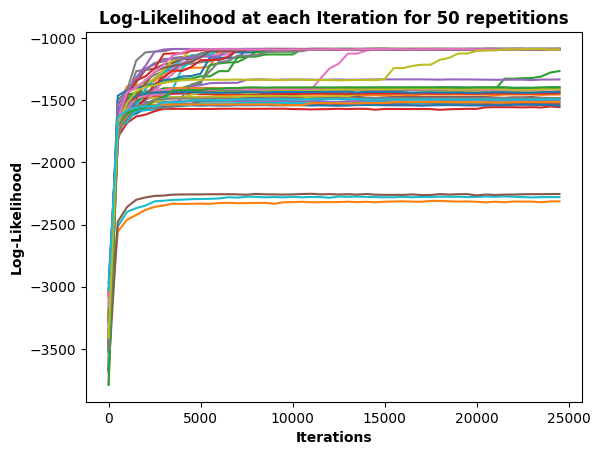

In [7]:
range_iters = list(range(0, iters, 500))
plt.xlabel("Iterations", fontweight = 'bold')
plt.ylabel("Log-Likelihood", fontweight = 'bold')
plt.title("Log-Likelihood at each Iteration for 50 repetitions", fontweight = 'bold')
for i in range(len(scores)):
    plt.plot(range_iters, scores[i])
plt.show()

In [9]:
correct_decoding_ratio = eval_solutions(text, solutions)
close_decoding_ratio = eval_close_solutions(text, solutions, perc_dict)
numeric_decoding_ration = eval_numeric_solutions(solutions)
print(f"For {attempts} attempts with {iters} iterations each, the algorithm found the correct solution with {correct_decoding_ratio} success ratio, the close solution with {close_decoding_ratio} ratio and numeric solution with {numeric_decoding_ration} ratio.")

For 50 attempts with 25000 iterations each, the algorithm found the correct solution with 0.14 success ratio, the close solution with 0.48 ratio and numeric solution with 0.06 ratio.


In [18]:
original_text_score = score_likelihood(text, perc_dict)
numeric_average_score = mean([score_likelihood(solution, perc_dict) for solution in solutions if is_numeric_solution(solution)])

print(f"Original message score: {original_text_score}\nAverage numeric solution score: {numeric_average_score}")

Original message score: -1089.069363335068
Average numeric solution score: -2282.56007741121
